In [1]:
import pandas as pd
#from sep_util import read_file
import utm
import numpy as np
import h5py
import time
import tqdm
import obspy
import datetime
import os

# Plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable
# %matplotlib inline
params = {
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'savefig.dpi': 300,  # to adjust notebook inline plot size
    'axes.labelsize': 18, # fontsize for x and y labels (was 10)
    'axes.titlesize': 18,
    'font.size': 18,
    'legend.fontsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'text.usetex':False,
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white'
}
matplotlib.rcParams.update(params)

In [2]:
# Adding pyDAS location
pyDAS_path = "/home/yinjx/DAS-utilities/build/"
import os
try:
    os.environ['LD_LIBRARY_PATH'] += ":" + pyDAS_path
except:
    os.environ['LD_LIBRARY_PATH'] = pyDAS_path
import sys
sys.path.insert(0,pyDAS_path)
sys.path.insert(0,'/home/yinjx/DAS-utilities/python')
import DASutils
import importlib
importlib.reload(DASutils)

<module 'DASutils' from '/home/ebiondi/research/packages/DAS-proc/python/DASutils.py'>

In [3]:
data_dir = '/kuafu/DASdata/GoogleData/LAX36-LAX28/2022-02-01T17:20:29_2022-02-01T17:30:29.h5'

In [4]:
data0, info = DASutils.readFile_HDF([data_dir], 0.5, 40.0, taper=0.0,filter=False,
                                        verbose=1, desampling=False, system="OptaSense", nChbuffer=5000)

data0 = data0.T
ntS = info['nt']
fs = info['fs']
das_dt = info['dt']
das_time = np.linspace(0.0, (ntS-1)*das_dt, ntS)

Processing data...: 100%|██████████| 1/1 [00:05<00:00,  5.22s/it]


WARNING! Missing GaugeLength, Fibre Refractive Index, and Laser Wavelength info from metadata. Skipping data strain conversion!


In [5]:
data0.shape

(30000, 4780)

In [43]:
data_diff = np.diff(data0, axis=0)/das_dt
das_time = das_time[:-1]+das_dt/2

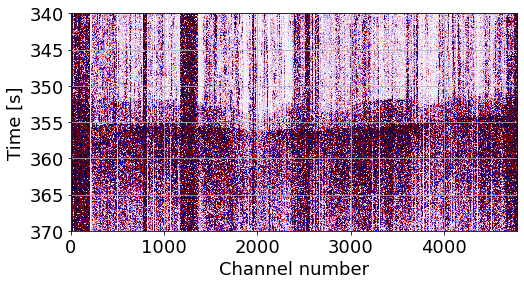

In [47]:
# Show data
fig, ax1 = plt.subplots(figsize=(8,4))
pclip=90
clipVal = np.percentile(np.absolute(data_diff), pclip)
# Vx
ax1.imshow(data_diff, 
        extent=[0, data_diff.shape[1], das_time[-1], das_time[0]],
        aspect='auto', vmin=-clipVal, vmax=clipVal, cmap=plt.get_cmap('seismic'))

# ax1.plot(np.arange(0, event_data.shape[1]), event_arrival_P[:, i_event], '--g', zorder=10)
# ax1.plot(np.arange(0, event_data.shape[1]), event_arrival_S[:, i_event], '-g', zorder=10)

ax1.set_xlabel("Channel number")
ax1.set_ylabel("Time [s]")
ax1.grid()
ax1.set_ylim(340, 370)
ax1.invert_yaxis()
# ax1.set_title(f'Event id {eq_id[i_event]}, M {eq_mag[i_event]}')

(340.0, 370.0)

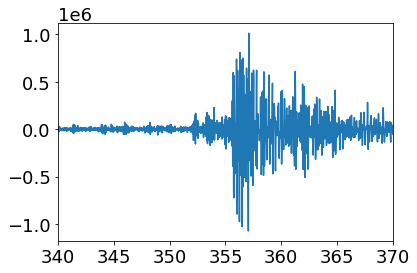

In [46]:
plt.plot(das_time, data_diff[:, 3300])
plt.xlim(340, 370)